In [97]:
# read the data
import pandas as pd
import os
import math
from matplotlib import pyplot as plt
data_path='dexmo_haptic_data'
list_csv=os.listdir(data_path)
# print(type(list_csv))


In [104]:
# description of dataset is such that the last row is the target, 
# the row[-2] is the Xn-t and row[0] is the Xn
# most important features are Xn and Xn-1 force vector
data_dict={}
for x in list_csv:
    df = pd.read_csv(os.path.join(data_path, x))
    print(f"{x[5:-4]}: {df.shape}")
    df = df[(df != 0).all(axis=1)]
    print(f"{x[5:-4]}: {df.shape}")
    data_dict[x[5:-4]]={"data": df,"Xn": df.iloc[:,0],"Xn-1": df.iloc[:,1],"Y": df.iloc[:,2]}
    # print(df.head())


Index: (359, 3)
Index: (354, 3)
Middle: (179, 3)
Middle: (176, 3)
Pinky: (300, 3)
Pinky: (296, 3)
Ring: (119, 3)
Ring: (117, 3)
Thumb: (299, 3)
Thumb: (294, 3)


In [145]:
print(data_dict.keys())
# inverence on data

non_fealt_xn_web=[]
fealt_xn_web=[]
xn_diff_web=[]
xn=data_dict["Index"]["Xn"]
xn_1=data_dict["Index"]["Xn-1"]
yn=data_dict["Index"]["Y"]

print(data_dict["Index"]["data"].shape)

dict_keys(['Index', 'Middle', 'Pinky', 'Ring', 'Thumb'])
(354, 3)


In [100]:
# Classifiers

In [106]:
# Webber classifier 

diff = abs((xn - xn_1) / xn_1)
# all the difference of (X_n - X_{n-1}) / (X_{n-1})
xn_diff_web = list(diff)
# xn_diff_web = [d_val for d_val in xn_diff_web if not math.isinf(d_val)]

# getting all the non perceived dots-> 
non_fealt_xn_web = [d if y == -1 else -100 for d, y in zip(xn_diff_web, yn)]
# getting all the perceived dots
fealt_xn_web = [d if (y == 1 and d is not math.isinf(d)) else -100 for d, y in zip(xn_diff_web, yn)]





# xn_diff_web = [d_val for d_val in xn_diff_web if not math.isinf(d_val)]
# non_fealt_xn_web = [l1 for d_val, l1 in zip(xn_diff_web, non_fealt_xn_web) if not math.isinf(d_val)]
# fealt_xn_web = [l2 for d_val, l2 in zip(xn_diff_web, fealt_xn_web) if not math.isinf(d_val)]


In [113]:
xn=list(xn)
print(type(xn))
print(xn[:4])

<class 'list'>
[0.7223, 0.0161, 0.2271, 0.9328]


In [107]:
print(len(non_fealt_xn_web), len(fealt_xn_web), len(xn_diff_web))

354 354 354


In [108]:
fealt_arr_web=[x for x in fealt_xn_web if x != -100]
non_fealt_arr_web=[x for x in non_fealt_xn_web if x != -100]
print(len(fealt_arr_web))
print(len(non_fealt_arr_web))
print(sum(fealt_arr_web))
print(sum(non_fealt_arr_web))

mean_delta_optimestic = sum(fealt_arr_web) / len(fealt_arr_web)
mean_delta_pessimistic = sum(non_fealt_arr_web) / len(non_fealt_arr_web)

squared_diff_sum = sum((x - mean_delta_pessimistic)**2 for x in non_fealt_arr_web)
variance=squared_diff_sum/(len(non_fealt_arr_web)-1)
std_dev_delta = math.sqrt(variance)


279
75
664.5342996504521
11.478114487594171


In [109]:
print(f"Mean webber constant delta :{mean_delta_pessimistic}\nVariance webber constant: {variance}\nStandard Deviation webber constant: {std_dev_delta}")
print(f"CV: {std_dev_delta/mean_delta_pessimistic}")

Mean webber constant delta :0.1530415265012556
Variance webber constant: 0.018718402299104098
Standard Deviation webber constant: 0.1368152122357163
CV: 0.8939744353281384


In [ ]:
#old
print(f"Mean webber constant delta :{mean_delta_pessimistic}\nVariance webber constant: {variance}\nStandard Deviation webber constant: {std_dev_delta}")
print(f"CV: {std_dev_delta/mean_delta_pessimistic}")

mean webber constant delta :0.8022745778378945
Variance webber constant: 1.8864540450124458
Standard Deviation webber constant: 1.373482451657991
CV: 1.7119855091999605


In [116]:
error_delta=[]
xn,xn_1,yn=list(xn),list(xn_1),list(yn)
# redo this in np with few lines
for x in range(len(xn_diff_web)):
    obs_current=(xn_diff_web[x])**2-(mean_delta_pessimistic*xn_1[x])**2
    if obs_current < 0:
        sign = -1
    elif obs_current == 0:
        sign = 0
    else:
        sign = 1

    summ_delta=(yn[x]-sign)**2
    error_delta.append(summ_delta)

# print(sum(error_delta))
mean_error_delta=(1/(4*len(xn_diff_web))) *sum(error_delta)
# print(mean_error_delta)
squared_diff_sum = sum((x/4 - mean_error_delta) ** 2 for x in error_delta)
variance_error_delta=squared_diff_sum/(len(error_delta)-1)
std_dev_error_delta = math.sqrt(variance_error_delta)

In [ ]:
#old
print(f"mean error webber classifier: {mean_error_delta}\nVariance error webber classifier: {variance_error_delta}\nStandard Deviation webber constant: {std_dev_error_delta}")
print(f"CV: {std_dev_error_delta/mean_error_delta}")

mean error webber classifier: 0.3107344632768362
Variance error webber classifier: 0.21478529472959815
Standard Deviation webber constant: 0.4634493442973009
CV: 1.491464253465859


In [118]:
# new
print(f"mean error webber classifier: {mean_error_delta}\nVariance error webber classifier: {variance_error_delta}\nStandard Deviation webber constant: {std_dev_error_delta}")
# print(f"CV: {std_dev_error_delta/mean_error_delta}")

mean error webber classifier: 0.1271186440677966
Variance error webber classifier: 0.11127382724348209
Standard Deviation webber constant: 0.33357731823893855


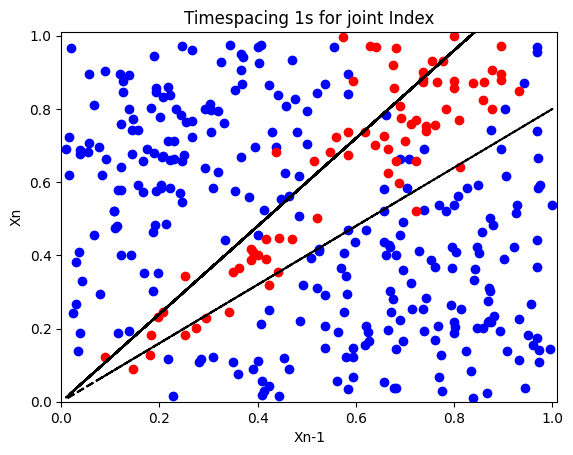

In [121]:
blue_tick=[]
red_tick=[]

index_correct_c=[]
index_incorrect_c=[]
xn_diff=[]
for x in range (len(xn)):
    if yn[x]==-1:
        index_incorrect_c.append(x)
    elif yn[x]==1:
        index_correct_c.append(x)




for x in range (len(xn)):
    if x in index_incorrect_c:
        red_tick.append(xn[x])
        blue_tick.append(-100)
    else:
        blue_tick.append(xn[x])
        red_tick.append(-100)


slope = 0.2
mean_delta_pessimistic = 0
intercept = 0
import numpy as np
xn_new = np.array(xn)
line_above = (1-slope) * xn_new + intercept
line_below= (1+slope)*xn_new - intercept

plt.plot(xn, line_above, color='black', linestyle='--', label='Straight Line')
plt.plot(xn, line_below, color='black', linestyle='--', label='Straight Line')

# print("size matric")
# print(fealt_xn,non_fealt_xn)
plt.scatter(blue_tick,xn_1,c="blue")
plt.scatter(red_tick,xn_1,c="red")
#plt.scatter(xn,xn_1,c="green")
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.xlabel('Xn-1')
plt.ylabel('Xn')
plt.title('Timespacing 1s for joint Index')
plt.savefig("webber_eas_Index.svg")
plt.show()

In [ ]:
# # Check and print missing values in each CSV file
# import pandas as pd
# import os

# # data_path = os.path.join(data_path, list_csv[0])  # Example path, change as needed
# # list_csv = os.listdir(data_path)

# for csv_file in list_csv:
#     df = pd.read_csv(os.path.join(data_path, csv_file))
#     missing_count = df.isnull().sum().sum()
#     print(f"{csv_file}: Total missing values = {missing_count}")
#     if missing_count > 0:
#         print(df.isnull().sum())
#         print(df[df.isnull().any(axis=1)])

data_Index.csv: Total missing values = 0
data_Middle.csv: Total missing values = 0
data_Pinky.csv: Total missing values = 0
data_Ring.csv: Total missing values = 0
data_Thumb.csv: Total missing values = 0


In [ ]:
# TODO 
# For all joints to the same

# old
index_incorrect_xn=[]
index_correct_xn=[]



xn_diff_c=0

deadzone_c=[]
deadzone_delta=[]

deadzone_c_opt=[]
deadzone_delta_opt=[]

all_diff=[]
# print(len(xn),len(xn_1),len(yn))
for x in range (1,len(xn)):
#     print(x)
    if yn[x]==-1:
        index_incorrect_xn.append(x)
        xn_diff_c=abs((xn[x]-xn_1[x]))
        xn_diff_delta=xn_diff_c/xn_1[x]
        deadzone_c.append(xn_diff_c)
        deadzone_delta.append(xn_diff_delta)
    elif yn[x]==1:
        index_correct_xn.append(x)
        xn_diff_c=abs((xn[x]-xn_1[x]))
        xn_diff_delta=xn_diff_c/xn_1[x]
        deadzone_c_opt.append(xn_diff_c)
        deadzone_delta_opt.append(xn_diff_delta)
    all_diff.append(xn[x]-xn_1[x])

# print(len(xn_diff_delta),len(xn_diff_c),len(all_diff))
print(len(deadzone_c),len(deadzone_delta),len(deadzone_c_opt),len(deadzone_delta_opt))


74 74 279 279


In [ ]:
# Constant Threshold C method

deadzone_c      = [abs(x - x1) for y, x, x1 in zip(yn, xn, xn_1) if y == -1]
# deadzone_delta  = [abs(x - x1) / x1 for y, x, x1 in zip(yn, xn, xn_1) if y == -1]
deadzone_c_opt  = [abs(x - x1) for y, x, x1 in zip(yn, xn, xn_1) if y == 1]
# deadzone_delta_opt = [abs(x - x1) / x1 for y, x, x1 in zip(yn, xn, xn_1) if y == 1]
index_correct_xn= [x for x in range(len(yn)) if yn[x] == 1]
index_incorrect_xn= [x for x in range(len(yn)) if yn[x] == -1]


In [140]:
mean_c_opt= sum(deadzone_c_opt) / len(deadzone_c_opt)
mean_c = sum(deadzone_c) / len(deadzone_c)

squared_diff_sum = sum((x - mean_c) ** 2 for x in deadzone_c)
variance_c=squared_diff_sum/(len(deadzone_c)-1)
std_dev_c = math.sqrt(variance_c)

squared_diff_sum = sum((x - mean_c_opt) ** 2 for x in deadzone_c_opt)
variance_c_opt=squared_diff_sum/(len(deadzone_c_opt)-1)
std_dev_c_opt = math.sqrt(variance_c_opt)

# print(f"Mean C: {mean_c}, Mean C opt: {mean_c_opt}, Variance C opt: {variance_c_opt}, Variance C: {variance_c}, \nStd Dev C: {std_dev_c}, Std Dev C opt: {std_dev_c_opt}")
print(f"Mean C: {mean_c}, Variance C: {variance_c}, \nStd Dev C: {std_dev_c}")
print(f"cv_c := {std_dev_c/mean_c}")

Mean C: 0.09087333333333335, Variance C: 0.008119223333333333, 
Std Dev C: 0.09010673300776881
cv_c := 0.9915640782895839


In [135]:
# error calculation in constant threshold method
error_lc=[]
summ_c=0
for x in range(len(xn)-1):
    obs_current=mean_c**2-(xn[x]-xn_1[x])**2
    if obs_current < 0:
        sign = -1
    elif obs_current == 0:
        sign = 0
    else:
        sign = 1
    #print(sign)
    error=(yn[x]-sign)**2
    summ_c=error+summ_c
    #print(summ_c)
    error_lc.append(error)

error_lc_opt=[]
summ_c=0
for x in range(len(xn)-1):
    obs_current=(all_diff[x])**2-mean_c_opt**2
    if obs_current < 0:
        sign = -1
    elif obs_current == 0:
        sign = 0
    else:
        sign = 1
    #print(sign)
    error=(yn[x]-sign)**2
    summ_c=error+summ_c
    #print(summ_c)
    error_lc_opt.append(error)    
mean_error_lc=(1/(4*(len(error_lc)) ) )*summ_c # check this from theory 
mean_error_lc_opt=(1/(4*(len(all_diff)) ) )*summ_c

squared_diff_sum = sum(((x/4) - mean_error_lc) ** 2 for x in error_lc)
std_dev_lc = math.sqrt(squared_diff_sum / len(error_lc))

print(f"mean error constant classifier: {mean_error_lc}\nVariance error constant classifier: {squared_diff_sum/len(error_lc)}\nStandard Deviation constant classifier: {std_dev_lc}")

mean error constant classifier: 0.5524079320113314
Variance error constant classifier: 0.21132502467718986
Standard Deviation constant classifier: 0.4597010166153539


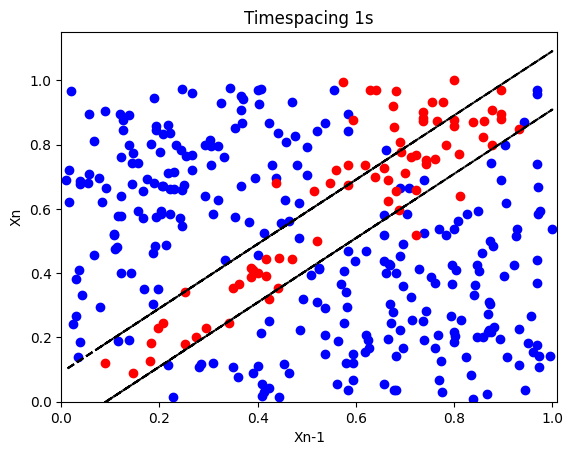

In [139]:


index_correct_c=[]
index_incorrect_c=[]
xn_diff=[]
for x in range (len(xn)):
    if yn[x]==-1:
        index_incorrect_c.append(x)
    elif yn[x]==1:
        index_correct_c.append(x)

blue_tick=[]
red_tick=[]
for x in range (len(xn)):
    if x in index_incorrect_c:
        red_tick.append(xn[x])
        blue_tick.append(-100)
    else:
        blue_tick.append(xn[x])
        red_tick.append(-100)


slope = 1
intercept = mean_c

xn=np.array(xn)
line_above =slope * xn + intercept
line_below=slope*xn - intercept

plt.plot(xn, line_above, color='black', linestyle='--', label='Straight Line')
plt.plot(xn, line_below, color='black', linestyle='--', label='Straight Line')


# print("size matric")
# print(fealt_xn,non_fealt_xn)
plt.scatter(blue_tick,xn_1,c="blue")
plt.scatter(red_tick,xn_1,c="red")
plt.xlabel('Xn-1')
plt.ylabel('Xn')
plt.title('Timespacing 1s')
#plt.scatter(xn,xn_1,c="green")
plt.xlim(0, 1.01)
plt.ylim(0, 1.15)
plt.show()

In [ ]:
# category 3 Random forest
# selection of feature
# import numpy as np

# xn = np.array([10, 8, 6, 5, 3, 2, 1])  # example data
# k = 3

features = []
for i in range(len(xn) - k):
    x0 = xn[i]
    x1 = xn[i+1]
    x2 = xn[i+2]
    x3 = xn[i+3]
    # For each window, build the feature vector:
    feat = [
        x0,
        x0 - x1,
        (x0 - x1) / x1 if x1 != 0 else np.nan,
        x3,
        x3 - xn[i+4] if i+4 < len(xn) else np.nan,
        (x3 - xn[i+4]) / xn[i+4] if i+4 < len(xn) and xn[i+4] != 0 else np.nan
    ]
    features.append(feat)

features = np.array(features)
print(features)

[[10.          2.          0.25        5.          2.          0.66666667]
 [ 8.          2.          0.33333333  3.          1.          0.5       ]
 [ 6.          1.          0.2         2.          1.          1.        ]
 [ 5.          2.          0.66666667  1.                 nan         nan]]


In [150]:
print(type(xn))
xn=np.array(xn)
yn=np.array(yn)
print(xn.shape[0])
print(yn.shape[0])

<class 'numpy.ndarray'>
354
354


In [153]:
k = 3

features = []
for i in range(xn.shape[0] - k):
    x0 = xn[i]
    x1 = xn[i+1]
    x2 = xn[i+2]
    x3 = xn[i+3]
    # For each window, build the feature vector:
    feat = [
        x0,
        x0 - x1,
        (x0 - x1) / x1 ,
        x1,
        x1 - x2,
        (x1 - x2) / x2 ,
        x2,
        (x2 - x3) ,
        (x2 - x3) / x3,
        yn[i]
    ]
    features.append(feat)

features = np.array(features)
print(features.shape)

(351, 10)


In [155]:
# check
# features[:,-1]==yn[:-3]
df = pd.DataFrame(features)
df.to_csv('RF_features.csv', index=False, header=False)

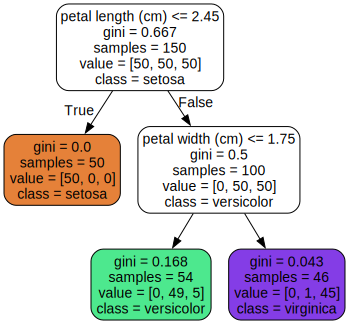

In [ ]:
# how to select p
# CART Algorithm
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target
tree_clf = DecisionTreeClassifier(max_depth=9, random_state=42)
tree_clf.fit(X_iris, y_iris)


from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,
out_file="iris_tree.dot",
feature_names=["petal length (cm)", "petal width (cm)"],
class_names=iris.target_names,
rounded=True,
filled=True)
from graphviz import Source
Source.from_file("iris_tree.dot")

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = features[:, :-1]  # features
y = features[:, -1]   # target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [163]:


from sklearn.tree import DecisionTreeClassifier


for x in range(9):

    tree_clf = DecisionTreeClassifier(max_depth=x+1, random_state=42)
    tree_clf.fit(X_train, y_train)



    # Predict on test set
    y_pred = tree_clf.predict(X_test)

    # Calculate accuracy
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Decision Tree accuracy for {x+1} features: {accuracy:.4f}")

Decision Tree accuracy for 1 features: 0.7746
Decision Tree accuracy for 2 features: 0.7746
Decision Tree accuracy for 3 features: 0.7324
Decision Tree accuracy for 4 features: 0.7606
Decision Tree accuracy for 5 features: 0.7183
Decision Tree accuracy for 6 features: 0.7183
Decision Tree accuracy for 7 features: 0.7324
Decision Tree accuracy for 8 features: 0.7606
Decision Tree accuracy for 9 features: 0.7465


In [166]:
# random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=9,
n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest accuracy: {acc:.4f}")

Random Forest accuracy: 0.7465


In [ ]:
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)